In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

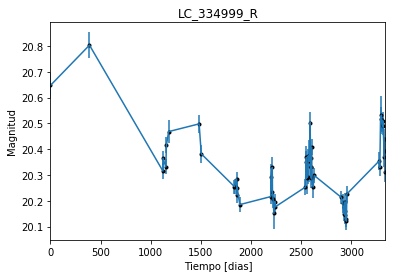

In [2]:
data = np.genfromtxt('LC_334999_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_334999_R')
plt.savefig("LC_334999_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

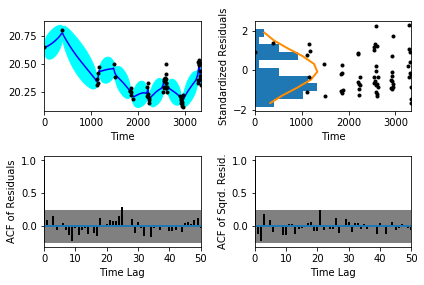

In [5]:
sample.assess_fit()

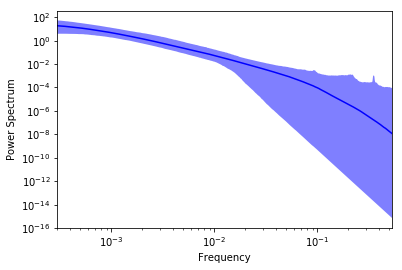

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

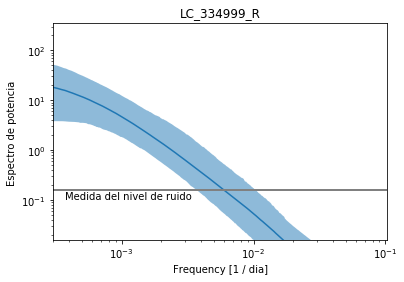

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_334999_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_334999_R')

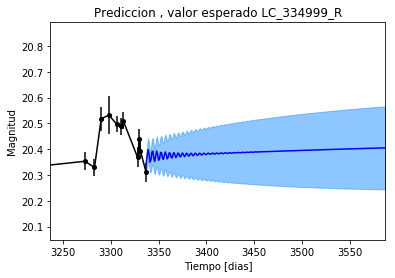

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_334999_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_334999_R')

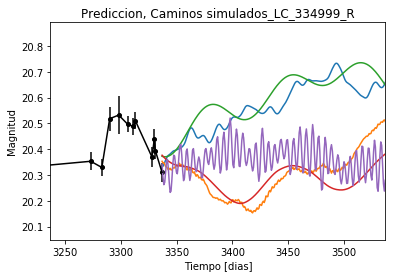

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_334999_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


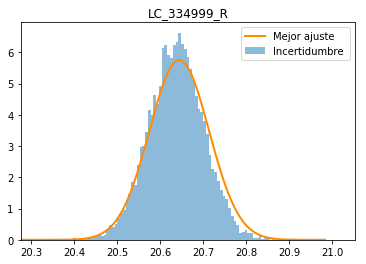

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_334999_R')
plt.savefig("Mejor_ajuste_LC_334999_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_334999_R')

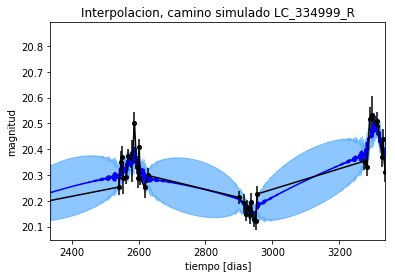

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_R')

Text(0.5,1,'Interpolacion, camino simulado LC_334999_R')

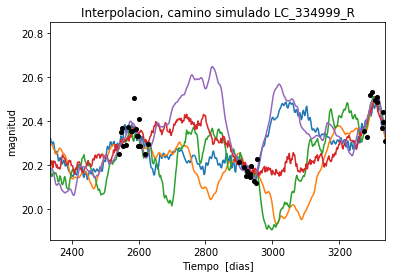

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1243.24369361
Median: 0.0209292576281
Standard deviation: 0.189651074902
68% credibility interval: [ 0.00154519  0.20826661]
95% credibility interval: [  4.17266155e-04   7.28046457e-01]
99% credibility interval: [  3.14098816e-04   9.42943191e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 758.107252146
Median: 0.0106826748476
Standard deviation: 0.113159246564
68% credibility interval: [ 0.0007688   0.08252885]
95% credibility interval: [  3.50452427e-04   4.13433461e-01]
99% credibility interval: [  3.09781665e-04   6.98025711e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 423.869345262
Median: 0.0858427827796
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 581.165603883
Median: 101.190162643
Standard deviation: 1.86306479474
68% credibility interval: [  99.12028614  102.48355284]
95% credibility interval: [  96.47430146  103.97000617]
99% credibility interval: [  94.3107561   104.73617068]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2629.03077578
Median: 1.34539812712
Standard deviation: 2.50070888916
68% credibility interval: [ 0.21505318  4.93416421]
95% credibility interval: [ 0.03766852  8.84135674]
99% credibility interval: [  0.02104257  11.79203432]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 447.105282123
Median: 2.8077014538
Standard deviation: 12.7230486746
68% credibility interval: [  0.19402346  19.44486794]
95% credibility interval: [  6.96207776e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11114.8021349
Median: 9.05662271243e-53
Standard deviation: 1.26027431467e+68
68% credibility interval: [  3.06008593e-114   1.01223941e-006]
95% credibility interval: [  1.36416327e-131   1.68990568e+002]
99% credibility interval: [  3.16881423e-145   1.75019125e+066]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1407.0874845
Median: 20.4044921339
Standard deviation: 0.0934522449051
68% credibility interval: [ 20.32183934  20.4974711 ]
95% credibility interval: [ 20.23268648  20.60295375]
99% credibility interval: [ 20.14387461  20.69365552]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 2271.44791323
Median: 0.147391922309
Standard deviation: 0.297428770485
68% credibility interval: [ 0.          0.62400061]
95% credibility interval: [ 0.          0.98503158]
99% credibility interval: [ 0.          1.05370444]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 2271.44791323
Median: 0.147391922309
Standard deviation: 0.297428770485
68% credibility interval: [ 0.          0.62400061]
95% credibility interval: [ 0.          0.98503158]
99% credibility interval: [ 0.          1.05370444]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1602.03064746
Median: 0.0
Standard deviation: 0.000350272476549
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 581.165603883
Median: 101.190162643
Standard deviation: 1.86306479474
68% credibility interval: [  99.12028614  102.48355284]
95% credibility interval: [  96.47430146  103.97000617]
99% credibility interval: [  94.3107561   104.73617068]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1632.49340082
Median: 0.0391119329451
Standard deviation: 0.0237530469414
68% credibility interval: [ 0.02554871  0.06244327]
95% credibility interval: [ 0.01696989  0.10298775]
99% credibility interval: [ 0.01367892  0.14796467]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 978.598832772
Median: 1.24172265454
Standard deviation: 0.223965374894
68% credibility interval: [ 1.02453126  1.4726895 ]
95% credibility interval: [ 0.86319331  1.73428526]
99% credibility interval: [ 0.7735618   1.89938959]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 561.600791936
Median: 0.0112492608449
Standard deviation: 0.367318972014
68% credibility interval: [ 0.00018198  0.17023272]
95% credibility interval: [  6.10829643e-07   1.09748594e+00]
99% credibility interval: [  1.37044443e-69   2.47267176e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1243.24369361
Median: (-0.131502404019-0.347372183975j)
Standard deviation: 2.21638329702
68% credibility interval: [-1.30857769+0.j         -0.00970870-3.85653818j]
95% credibility interval: [ -4.57445080e+00+0.j          -2.62176057e-03-0.06761225j]
99% credibility interval: [ -5.92468680e+00 -5.50750416e+00j  -1.97354107e-03 -1.67349572e-03j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 758.107252146
Median: (-0.0671212256439+0.18631327855j)
Standard deviation: 1.99948380196
68% credibility interval: [-0.51854403+5.89605666j -0.00483049+2.91343696j]
95% credibility interval: [ -2.59767905e+00+1.49517536j  -2.20195754e-03+0.j        ]
99% credibility interval: [ -4.38582489e+00+4.74886612j  -1.94641561e-03+0.08686